In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import Libraries
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [4]:
# Load Dataset
base_dataset_path = 'fer2013'

train_data_dir = os.path.join(base_dataset_path, 'train')
validation_data_dir = os.path.join(base_dataset_path, 'test')

In [5]:
print(train_data_dir)
print(validation_data_dir)

fer2013\train
fer2013\test


Dataset First View

Viewing images from Training Images Folder


5 random Images in the angry folder out of 3995 total files


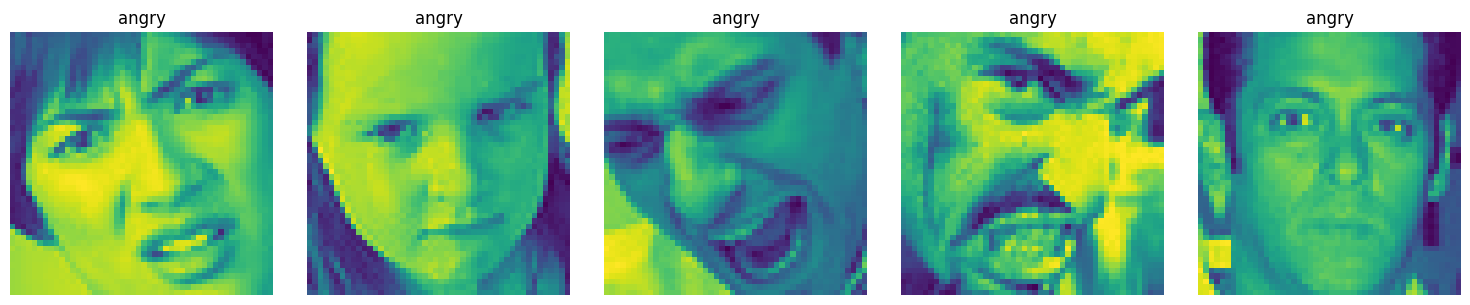

****************************************************************************************************
5 random Images in the disgust folder out of 436 total files


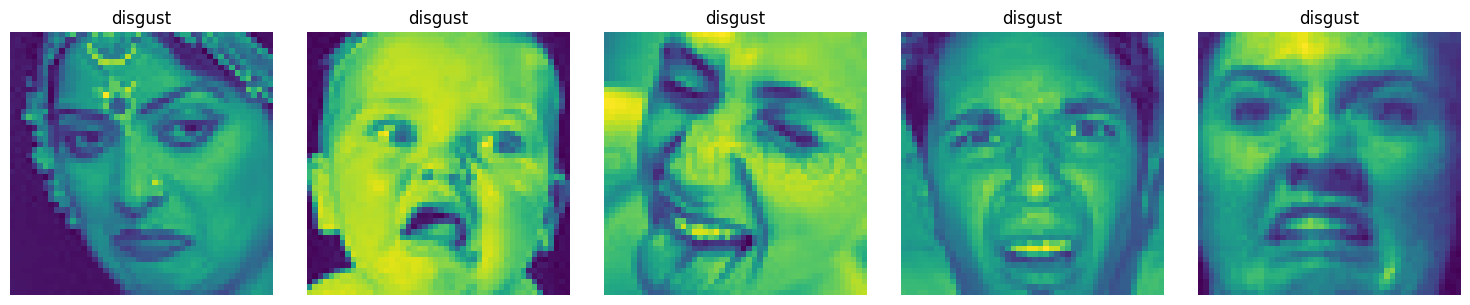

****************************************************************************************************
5 random Images in the fear folder out of 4097 total files


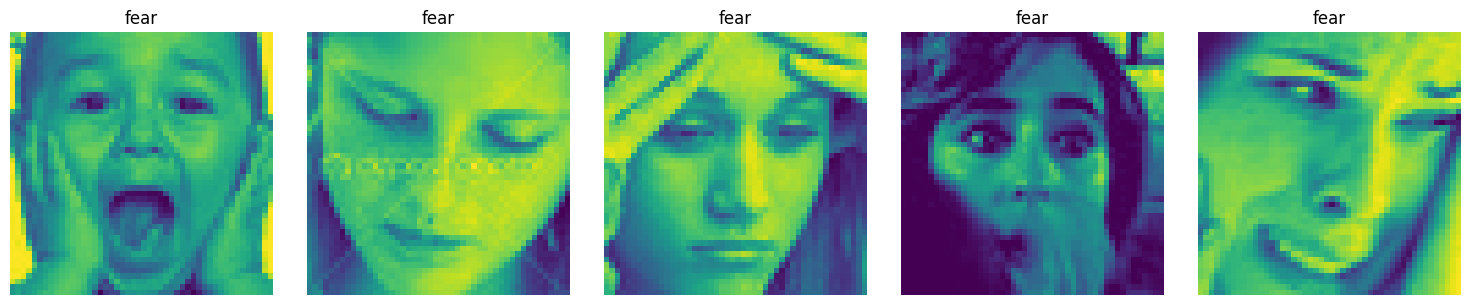

****************************************************************************************************
5 random Images in the happy folder out of 7215 total files


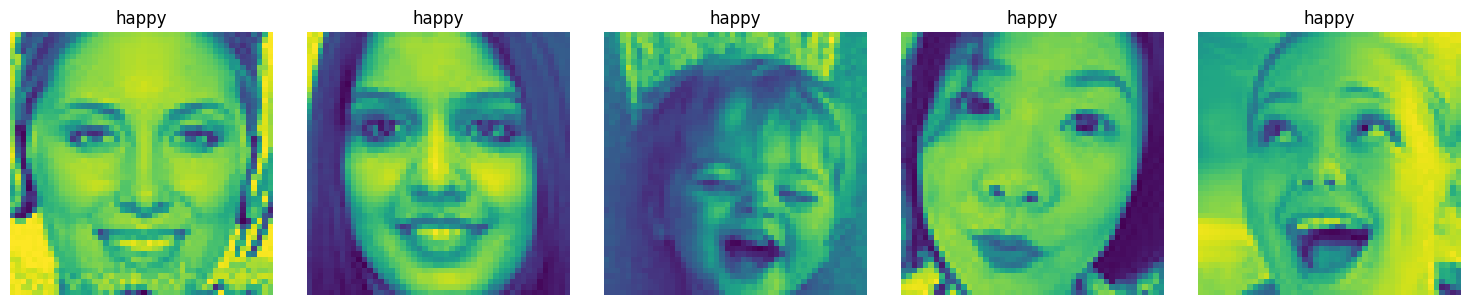

****************************************************************************************************
5 random Images in the neutral folder out of 4965 total files


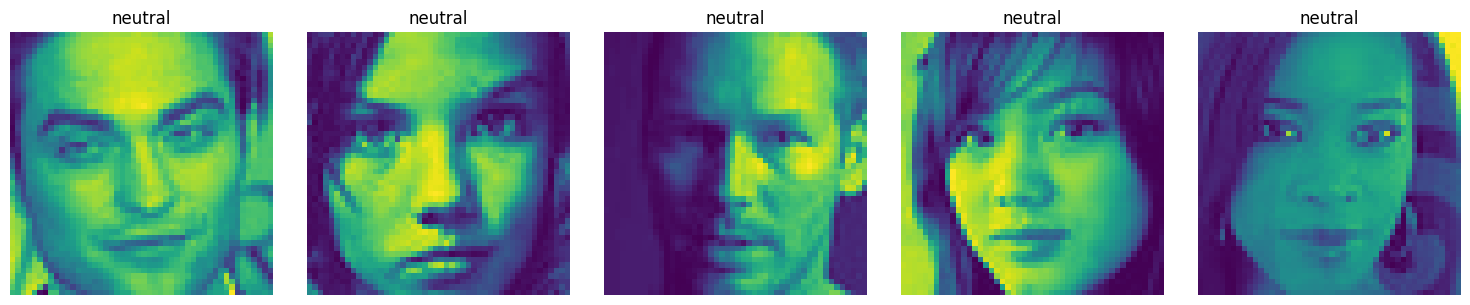

****************************************************************************************************
5 random Images in the sad folder out of 4830 total files


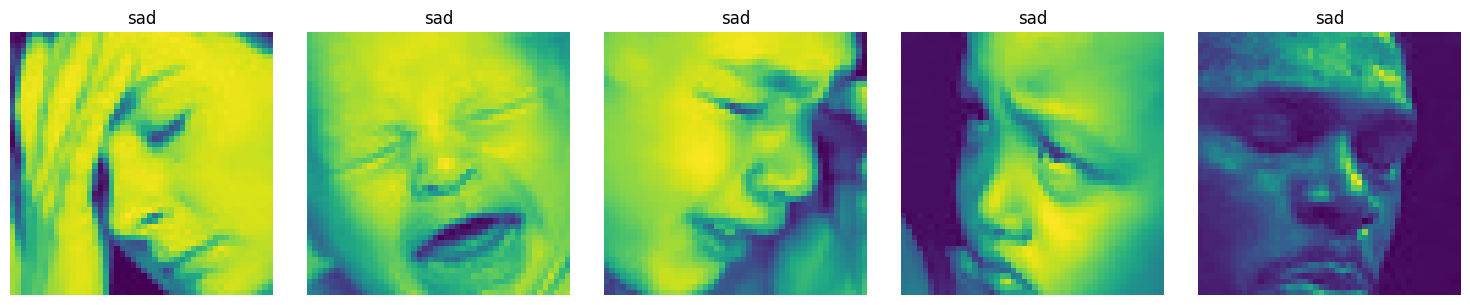

****************************************************************************************************
5 random Images in the surprise folder out of 3171 total files


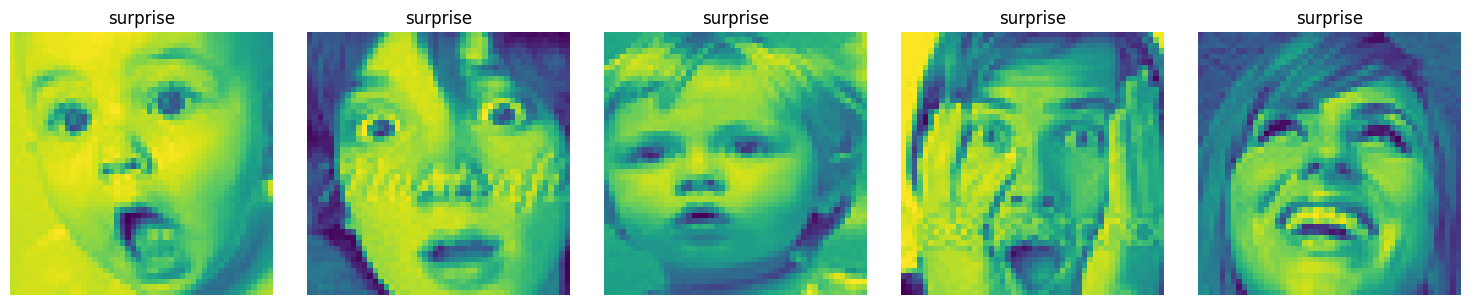

****************************************************************************************************


In [5]:
# Dataset First Look
train_path = 'fer2013/train'
train_classes = os.listdir(train_path)

for class_name in train_classes:
    class_dir = os.path.join(train_path, class_name)
    images_files = os.listdir(class_dir)

    print(f"5 random Images in the {class_name} folder out of {len(images_files)} total files")

    random_images = random.sample(images_files, min(5, len(images_files)))

    plt.figure(figsize = (15, 3))
    for index, images in enumerate(random_images):
        img_path = os.path.join(class_dir, images)
        img = Image.open(img_path)

        plt.subplot(1, 5, index+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("*"*100)

Viewing images from Validation Images Folder

5 random Images in the angry folder out of 958 total files


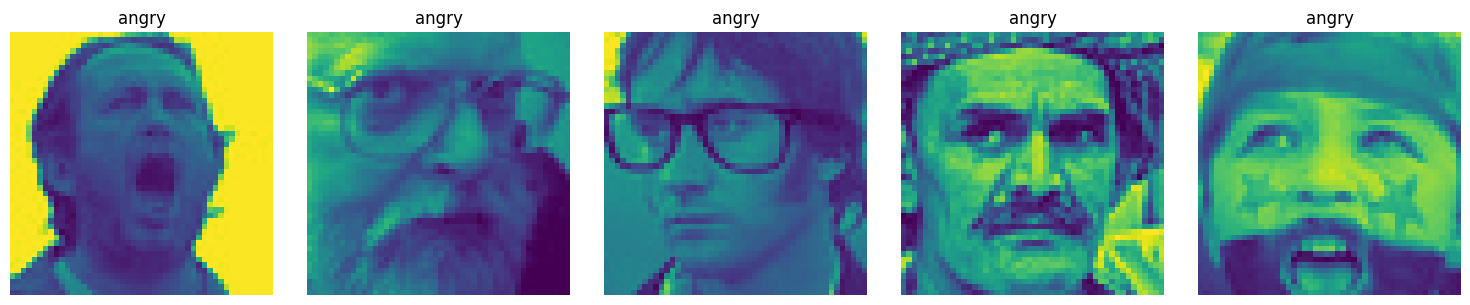

****************************************************************************************************
5 random Images in the disgust folder out of 111 total files


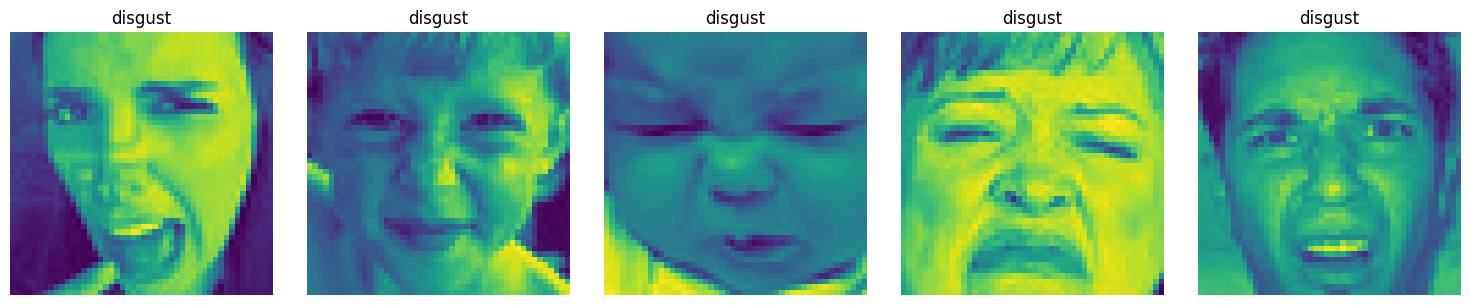

****************************************************************************************************
5 random Images in the fear folder out of 1024 total files


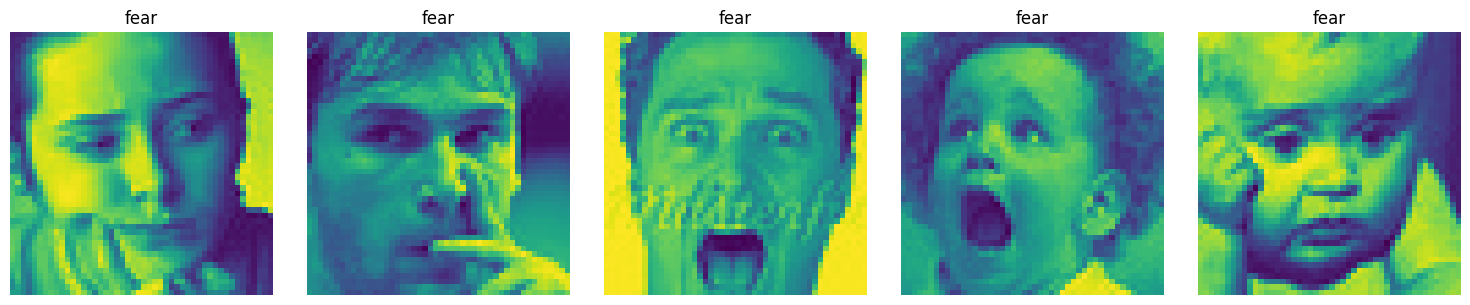

****************************************************************************************************
5 random Images in the happy folder out of 1774 total files


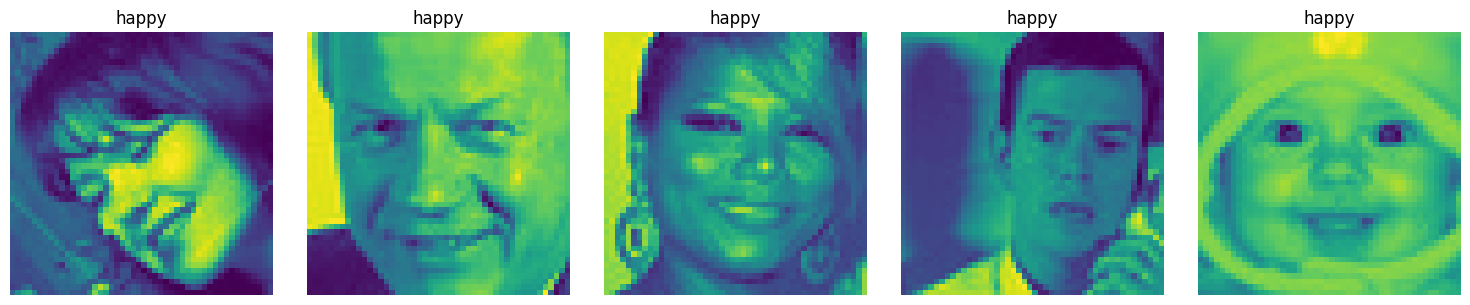

****************************************************************************************************
5 random Images in the neutral folder out of 1233 total files


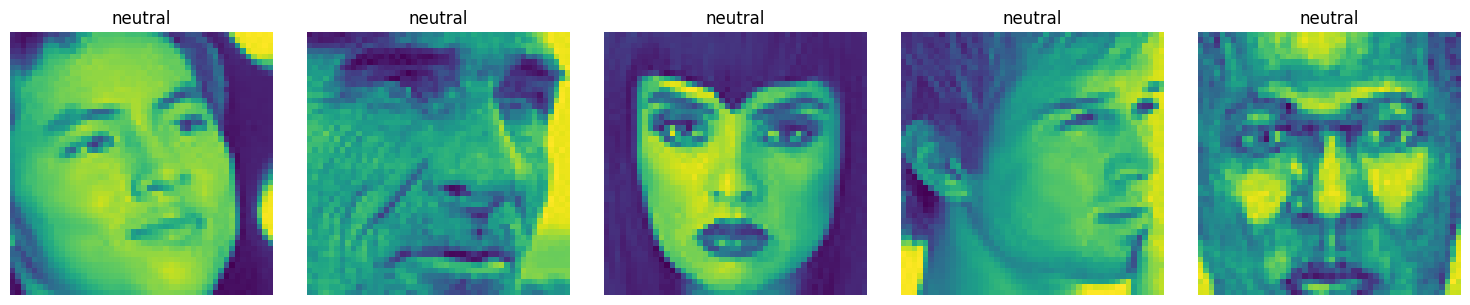

****************************************************************************************************
5 random Images in the sad folder out of 1247 total files


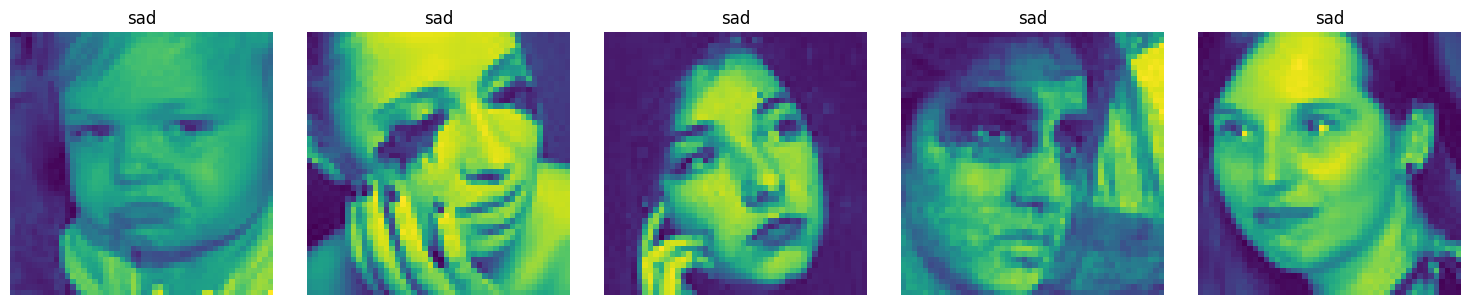

****************************************************************************************************
5 random Images in the surprise folder out of 831 total files


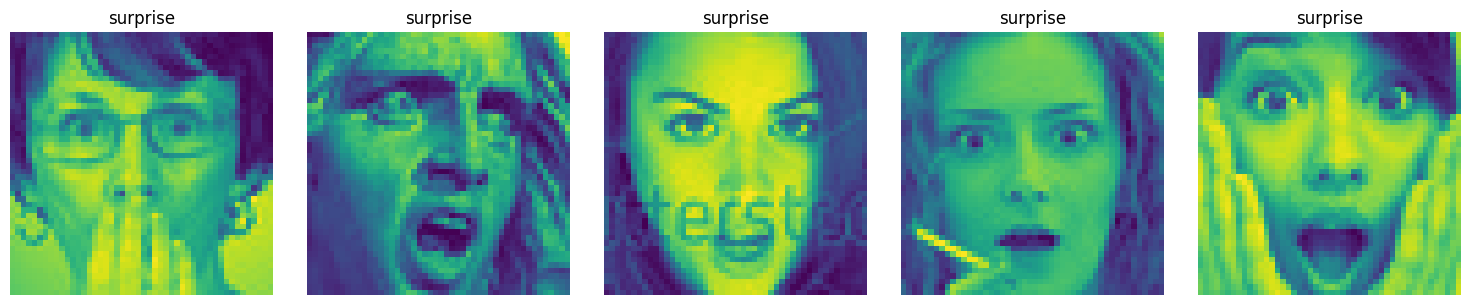

****************************************************************************************************


In [6]:
# Validation Dataset First Look
val_path = 'fer2013/test'
val_classes = os.listdir(val_path)

for class_name in val_classes:
    class_dir = os.path.join(val_path, class_name)
    images_files = os.listdir(class_dir)

    print(f"5 random Images in the {class_name} folder out of {len(images_files)} total files")

    random_images = random.sample(images_files, min(5, len(images_files)))

    plt.figure(figsize = (15, 3))
    for index, images in enumerate(random_images):
        img_path = os.path.join(class_dir, images)
        img = Image.open(img_path)

        plt.subplot(1, 5, index+1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()
    print("*"*100)

image count

In [7]:
main_dir = 'fer2013'
main_dir_files = os.listdir(main_dir)
for sub_dir in main_dir_files:
    class_dir = os.path.join(main_dir, sub_dir)
    class_dir_files = os.listdir(class_dir)
    print("-"*90)
    print(f"Folder inside {sub_dir}: {class_dir_files}")
    print(f"Total Classes in the {sub_dir} folder is: {len(class_dir_files)}")

    total_images = 0
    for files in class_dir_files:
        files_dir  =  os.path.join(class_dir, files)
        images_count = len(os.listdir(files_dir))
        total_images+=images_count
        print(f"Count of images inside {files} : {images_count}")
    print()
    print(f"Total images in {sub_dir} Folder : {total_images}")
    print()

------------------------------------------------------------------------------------------
Folder inside test: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Total Classes in the test folder is: 7
Count of images inside angry : 958
Count of images inside disgust : 111
Count of images inside fear : 1024
Count of images inside happy : 1774
Count of images inside neutral : 1233
Count of images inside sad : 1247
Count of images inside surprise : 831

Total images in test Folder : 7178

------------------------------------------------------------------------------------------
Folder inside train: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Total Classes in the train folder is: 7
Count of images inside angry : 3995
Count of images inside disgust : 436
Count of images inside fear : 4097
Count of images inside happy : 7215
Count of images inside neutral : 4965
Count of images inside sad : 4830
Count of images inside surprise : 3171

Total images in 

Duplicate Images

In [8]:
import os
import hashlib

def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file = f.read()
        hasher.update(file)
    return hasher.hexdigest()

# Function to find duplicate images
def find_duplicates(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                if file_hash in hashes:
                    duplicates.append((file_path, hashes[file_hash]))
                else:
                    hashes[file_hash] = file_path

            except Exception as e:
                print(f"Error: {e}")

    return duplicates

dups = find_duplicates('fer2013')
print(f"Total duplicate files found: {len(dups)}")

Total duplicate files found: 1853


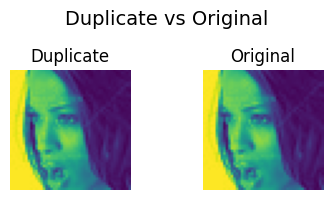

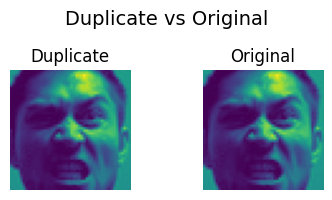

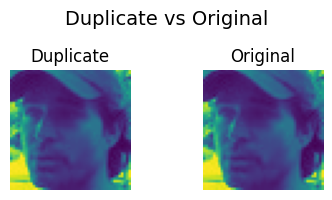

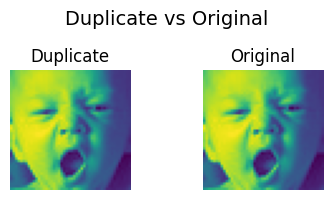

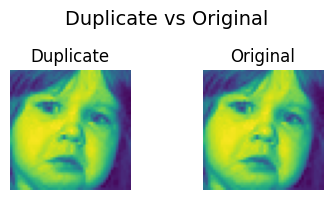

In [9]:
# Randomly sample up to 5 duplicate pairs
random_images = random.sample(dups, min(5, len(dups)))

for dup_path, original_path in random_images:
    try:
        dup_img = Image.open(dup_path)
        orig_img = Image.open(original_path)

        plt.figure(figsize=(4, 2))

        plt.subplot(1, 2, 1)
        plt.imshow(dup_img)
        plt.title("Duplicate")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(orig_img)
        plt.title("Original")
        plt.axis('off')

        plt.suptitle("Duplicate vs Original", fontsize=14)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Could not open images: {dup_path}, {original_path} → {e}")

In [10]:
import os
import hashlib

# Function to calculate the MD5 hash of a file
def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file_data = f.read()
        hasher.update(file_data)
    return hasher.hexdigest()

# Function to find duplicates across all folders and classes
def find_duplicates_with_classes(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                class_name = os.path.basename(os.path.dirname(file_path))

                if file_hash in hashes:
                    original_path = hashes[file_hash]['path']
                    original_class = hashes[file_hash]['class']

                    duplicates.append({
                        'duplicate_path': file_path,
                        'duplicate_class': class_name,
                        'original_path': original_path,
                        'original_class': original_class
                    })
                else:
                    hashes[file_hash] = {'path': file_path, 'class': class_name}

            except Exception as e:
                print(f"Error processing {file_path}: {e}")

    return duplicates


duplicates = find_duplicates_with_classes('fer2013')

# Print results
print(f"Total duplicate files found: {len(duplicates)}\n")

duplicates_different_classes = 0
for dup in duplicates:
    if dup['duplicate_class'] != dup['original_class']:
        duplicates_different_classes+=1
        print(f"Duplicate Image : {dup['duplicate_path']} (Class: {dup['duplicate_class']})")
        print(f"Original Image  : {dup['original_path']} (Class: {dup['original_class']})")
print()
print("-"*90)
print("Total Number of duplicates with different classes :", duplicates_different_classes)

Total duplicate files found: 1853

Duplicate Image : fer2013\test\fear\PublicTest_11067233.jpg (Class: fear)
Original Image  : fer2013\test\angry\PublicTest_80419054.jpg (Class: angry)
Duplicate Image : fer2013\test\sad\PrivateTest_70680879.jpg (Class: sad)
Original Image  : fer2013\test\fear\PrivateTest_4712911.jpg (Class: fear)
Duplicate Image : fer2013\test\sad\PublicTest_61948626.jpg (Class: sad)
Original Image  : fer2013\test\fear\PrivateTest_4712911.jpg (Class: fear)
Duplicate Image : fer2013\test\surprise\PrivateTest_44907068.jpg (Class: surprise)
Original Image  : fer2013\test\fear\PrivateTest_29356749.jpg (Class: fear)
Duplicate Image : fer2013\test\surprise\PublicTest_48991844.jpg (Class: surprise)
Original Image  : fer2013\test\happy\PrivateTest_73887528.jpg (Class: happy)
Duplicate Image : fer2013\train\angry\Training_11036720.jpg (Class: angry)
Original Image  : fer2013\test\sad\PublicTest_86086159.jpg (Class: sad)
Duplicate Image : fer2013\train\angry\Training_22572626.jp

corrupt images


In [11]:
# Missing Values/Null Values Count
from PIL import Image

def check_missing_or_corrupt_images(directory):
    corrupt_images = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            path = os.path.join(root, file)
            try:
                img = Image.open(path)
                img.verify()
            except:
                corrupt_images.append(path)

    print(f"Corrupt or Unreadable Images: {len(corrupt_images)}")
    return corrupt_images

# Check both train and validation sets
corrupt_train = check_missing_or_corrupt_images(train_data_dir)
corrupt_val = check_missing_or_corrupt_images(validation_data_dir)

Corrupt or Unreadable Images: 0
Corrupt or Unreadable Images: 0


In [12]:
import os
import hashlib

def md5_hasher(file_path):
    hasher = hashlib.md5()
    with open(file_path, 'rb') as f:
        file = f.read()
        hasher.update(file)
    return hasher.hexdigest()

# Function to find duplicate images
def find_duplicates(folder_path):
    hashes = {}
    duplicates = []

    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                file_hash = md5_hasher(file_path)

                if file_hash in hashes:
                    duplicates.append((file_path, hashes[file_hash]))
                else:
                    hashes[file_hash] = file_path

            except Exception as e:
                print(f"Error: {e}")

    return duplicates

dups = find_duplicates('preprocessed_images')
print(f"Total duplicate files found: {len(dups)}")

Total duplicate files found: 0


In [13]:
# ✅ Delete duplicates
for dup in dups:
    duplicate_file = dup[0]

    if os.path.exists(duplicate_file):
        try:
            os.remove(duplicate_file)
            print(f"✅ Deleted: {duplicate_file}")

        except Exception as e:
            print(f"Error deleting {duplicate_file}: {e}")

    else:
        print(f"File already deleted or not found: {duplicate_file}")

print("\n✅ All duplicate images deletion check completed!")


✅ All duplicate images deletion check completed!


In [14]:
import os
import pandas as pd

data = []

def count_images(main_dir, phase):
    main_dir_files = os.listdir(main_dir)
    for sub_dir in main_dir_files:
        class_dir = os.path.join(main_dir, sub_dir)
        class_dir_files = os.listdir(class_dir)

        total_images_in_folder = 0

        for files in class_dir_files:
            files_dir = os.path.join(class_dir, files)
            images_count = len(os.listdir(files_dir))

            total_images_in_folder += images_count

            data.append({
                'Main Folder': sub_dir,
                'Class': files,
                'Images Count': images_count,
                'Phase': phase
            })

        # ✅ Append total count for the folder
        data.append({
            'Main Folder': sub_dir,
            'Class': 'Total',
            'Images Count': total_images_in_folder,
            'Phase': phase
        })

count_images('fer2013', 'Before')
count_images('preprocessed_images', 'After')

df = pd.DataFrame(data)
comparison_df = df.pivot_table(index=['Main Folder', 'Class'],
                               columns='Phase',
                               values='Images Count',
                               fill_value=0).reset_index()
comparison_df

Phase,Main Folder,Class,After,Before
0,test,Total,7092.0,7178.0
1,test,angry,946.0,958.0
2,test,disgust,109.0,111.0
3,test,fear,1013.0,1024.0
4,test,happy,1767.0,1774.0
5,test,neutral,1225.0,1233.0
6,test,sad,1240.0,1247.0
7,test,surprise,792.0,831.0
8,train,Total,26942.0,28709.0
9,train,angry,3790.0,3995.0


In [15]:
# checking the unique file formats i have in these folders
def check_unique_file_formats(folder_path):
    extensions = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_extension = os.path.splitext(file)[1]
            if file_extension not in extensions:
                extensions.append(file_extension)
        print(f"Unique files in {root}: {extensions}")
        print("-"*80)

folder_path = 'fer2013'
check_unique_file_formats(folder_path)

Unique files in fer2013: []
--------------------------------------------------------------------------------
Unique files in fer2013\test: []
--------------------------------------------------------------------------------
Unique files in fer2013\test\angry: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2013\test\disgust: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2013\test\fear: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2013\test\happy: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2013\test\neutral: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2013\test\sad: ['.jpg']
--------------------------------------------------------------------------------
Unique files in fer2

In [16]:
# checking the unique images size
def check_image_size(folder_path):
    size = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            image_path = os.path.join(root, file)
            with Image.open(image_path) as img:
                image_size = img.size
            if image_size not in size:
                size.append(image_size)

        print(f"Unique image size in {root}: {size}")
        print("-"*80)

folder_path = 'fer2013'
check_image_size(folder_path)

Unique image size in fer2013: []
--------------------------------------------------------------------------------
Unique image size in fer2013\test: []
--------------------------------------------------------------------------------
Unique image size in fer2013\test\angry: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in fer2013\test\disgust: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in fer2013\test\fear: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in fer2013\test\happy: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in fer2013\test\neutral: [(48, 48)]
--------------------------------------------------------------------------------
Unique image size in fer2013\test\sad: [(48, 48)]
-------------------------------------------------

In [17]:
# Set your directory path
base_path = "fer2013"

file_data = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            size_kb = os.path.getsize(file_path) / 1024
            file_data.append({
                "file_name": file,
                "folder": os.path.relpath(root, base_path),
                "size_kb": round(size_kb, 2)
            })
        except Exception as e:
            print(f"Error reading {file_path}: {e}")

# Create DataFrame
df = pd.DataFrame(file_data)

# Sort by size to detect anomalies
df_sorted = df.sort_values(by="size_kb", ascending=False)
df_sorted

,file_name,folder,size_kb
1078,PrivateTest_1161501.jpg,test\fear,2.42
1071,PrivateTest_10306709.jpg,test\fear,2.34
15104,Training_87394233.jpg,train\fear,2.34
318,PrivateTest_67702983.jpg,test\angry,2.31
722,PublicTest_57272892.jpg,test\angry,2.31
...,...,...,...
7180,Training_10131352.jpg,train\angry,0.35
34057,Training_48403842.jpg,train\surprise,0.35
27290,Training_89335926.jpg,train\neutral,0.35
8016,Training_28756096.jpg,train\angry,0.35


In [18]:
print("Unique File Sizes (KB):")
print(df["size_kb"].unique())
print("Total Files Scanned:", len(df))

Unique File Sizes (KB):
[1.68 1.65 1.23 1.6  1.76 1.96 1.56 1.79 1.57 1.53 1.54 1.47 1.58 1.62
 1.21 1.4  1.55 1.7  1.49 1.43 1.48 1.67 1.61 1.51 1.36 1.27 1.38 1.46
 1.59 2.24 1.45 1.85 1.64 1.33 1.44 1.3  1.74 1.5  1.32 1.52 1.69 1.86
 1.66 1.83 1.22 1.42 1.75 1.63 1.39 1.97 1.41 1.88 1.2  2.22 1.25 1.07
 1.37 1.35 1.28 1.26 1.31 1.71 1.81 1.84 1.14 1.73 1.01 1.34 1.11 1.77
 1.78 1.92 1.93 1.09 1.72 1.15 2.04 1.16 2.31 1.29 1.99 1.8  1.89 1.24
 1.82 1.98 1.91 1.06 1.05 0.35 1.94 1.08 2.07 1.18 2.08 2.1  2.01 1.9
 2.34 2.42 1.19 2.09 1.87 2.25 1.02 2.11 2.05 2.02 2.   1.12 1.1  1.13
 0.91 1.95 0.6  0.9  0.88 1.03 2.14 1.04 2.13 1.17 0.97 0.94 2.18 1.
 0.93 0.82 2.26 2.19 0.68 2.17 0.92 2.06 0.98 0.54 2.03 2.23 0.95 2.12
 0.84 0.96 2.21 2.16 0.55 2.15 0.77 0.81 2.2  2.28 0.87 0.66 0.45 0.99
 0.71 0.85]
Total Files Scanned: 35887


In [19]:
from facenet_pytorch import MTCNN
from PIL import Image
import os
from tqdm import tqdm

# ✅ Initialize MTCNN face detector
mtcnn = MTCNN(keep_all=True)
folder_path = 'fer2013'
no_face_images = []

for root, dirs, files in os.walk(folder_path):
    for file in tqdm(files):
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            file_path = os.path.join(root, file)

            try:
                img = Image.open(file_path).convert('RGB')
                boxes, _ = mtcnn.detect(img)
                if boxes is None:
                    no_face_images.append(file_path)

            except Exception as e:
                print(f"⚠️ Error processing {file_path}: {e}")
                no_face_images.append(file_path)

if len(no_face_images) == 0:
    print("✅ All images have faces.")
else:
    print(f"Found {len(no_face_images)} images with NO faces:")

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 831/831 [00:08<00:00, 101.63it/s]
0it [00:00, ?it/s]
100%|██████████| 3171/3171 [00:29<00:00, 106.00it/s]

Found 5728 images with NO faces:


In [20]:
# Save
pd.DataFrame(no_face_images, columns=['FilePath']).to_csv('no_face_images.csv', index=False)

In [21]:
# Load
no_face_images = pd.read_csv('no_face_images.csv')
no_face_images.head()

,FilePath
0,fer2013\test\angry\PrivateTest_1054527.jpg
1,fer2013\test\angry\PrivateTest_11296953.jpg
2,fer2013\test\angry\PrivateTest_12403575.jpg
3,fer2013\test\angry\PrivateTest_13278552.jpg
4,fer2013\test\angry\PrivateTest_13541561.jpg


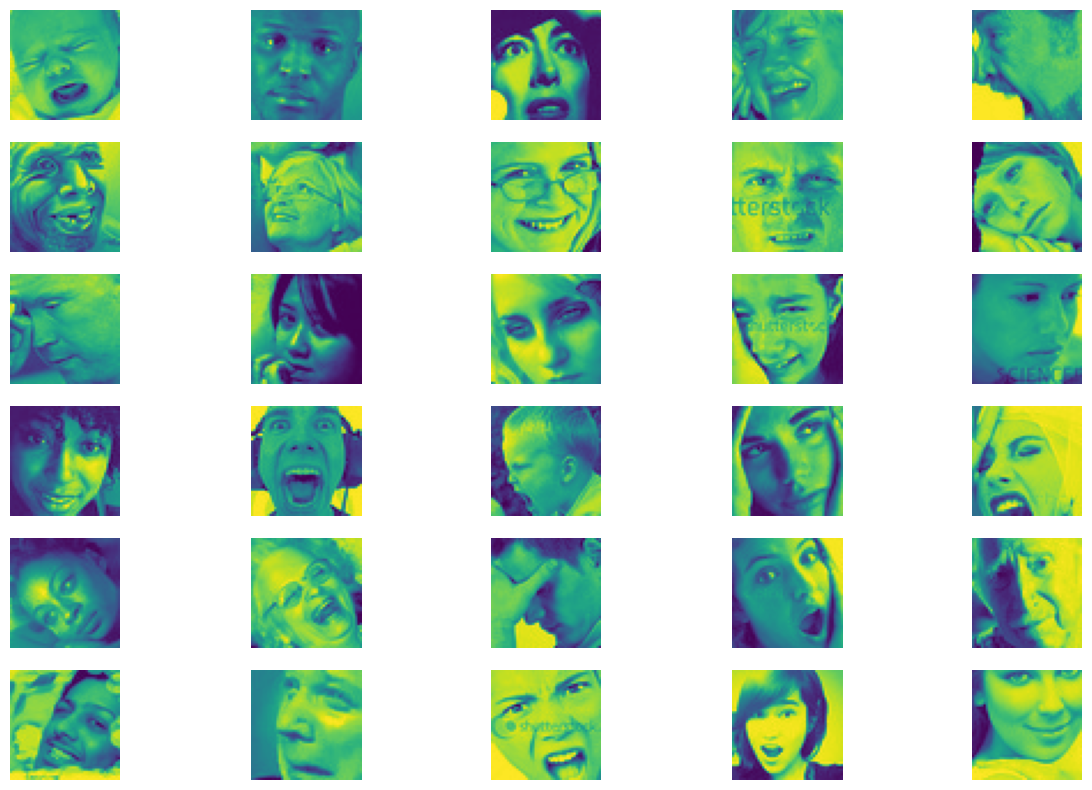

In [22]:
no_face_images_list = no_face_images['FilePath'].tolist()
random30 = random.sample(no_face_images_list, min(30, len(no_face_images_list)))
plt.figure(figsize=(15,10))
for index, file_path in enumerate(random30):
    plt.subplot(6, 5, index+1)
    img = Image.open(file_path)
    plt.imshow(img)
    plt.axis("off")
plt.show()

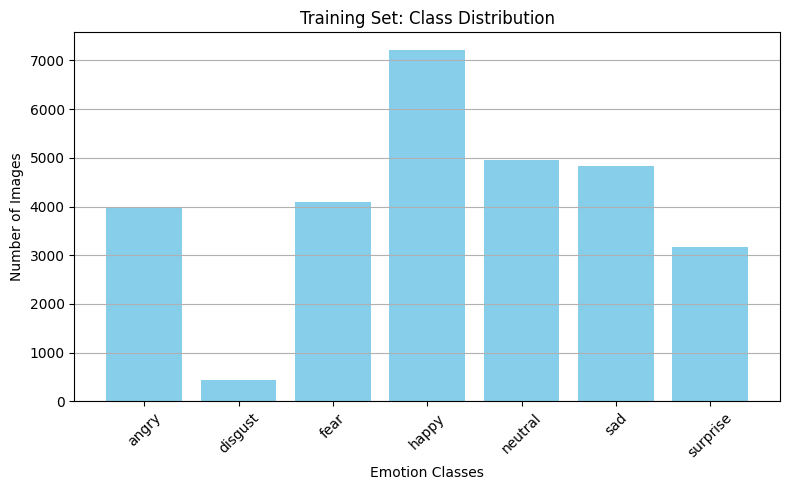

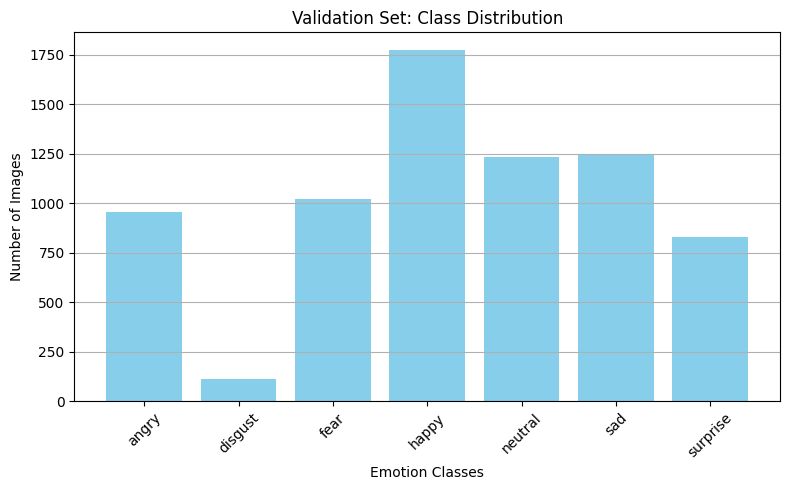

In [23]:
# Chart - 1 visualization code
def plot_class_distribution(directory, title):
    classes = os.listdir(directory)
    counts = [len(os.listdir(os.path.join(directory, cls))) for cls in classes]

    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts, color='skyblue')
    plt.xlabel('Emotion Classes')
    plt.ylabel('Number of Images')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_class_distribution(train_data_dir, 'Training Set: Class Distribution')
plot_class_distribution(validation_data_dir, 'Validation Set: Class Distribution')

Deep Learning model 1


In [24]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Flatten, Dense,
                                     Dropout, BatchNormalization, Rescaling,
                                     RandomFlip, RandomRotation, RandomZoom)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [25]:
# importing libraries for building the model
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/test'
model_save_path = 'cnn_first_model.keras'

class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
IMG_SIZE = (48, 48)
BATCH_SIZE = 128
EPOCHS = 100

In [26]:
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/test'
model_save_path = 'cnn_first_model.keras'

In [27]:
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
IMG_SIZE = (48, 48)
BATCH_SIZE = 128
EPOCHS = 100

In [28]:
# ✅ Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# ✅ Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

data_augmentation = Sequential([
    Rescaling(1./255),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

Found 26942 files belonging to 7 classes.
Found 7092 files belonging to 7 classes.


In [29]:
model = Sequential([
    tf.keras.Input(shape=(48, 48, 1)),

    # ✅ Data Augmentation Layer
    data_augmentation,

    # ✅ Block 1
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Block 2
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Block 3
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # ✅ Fully Connected Layer
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # ✅ Output Layer
    Dense(7, activation='softmax', dtype='float32')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,04

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [31]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks = [
    EarlyStopping(
        patience=10,
        monitor='val_loss',
        restore_best_weights=True
    ),
    ModelCheckpoint(
        filepath=model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

Epoch 1/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4129 - loss: 1.5330
Epoch 1: val_accuracy improved from None to 0.43613, saving model to cnn_first_model.keras

Epoch 1: finished saving model to cnn_first_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.4350 - loss: 1.4707 - val_accuracy: 0.4361 - val_loss: 1.5419
Epoch 2/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4838 - loss: 1.3381
Epoch 2: val_accuracy improved from 0.43613 to 0.48576, saving model to cnn_first_model.keras

Epoch 2: finished saving model to cnn_first_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.4940 - loss: 1.3197 - val_accuracy: 0.4858 - val_loss: 1.3491
Epoch 3/100
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5173 - loss: 1.2574
Epoch 3: val_accuracy improved from 0.48576 to 0.53553, saving model to cnn_first_model.keras

Epoch 3: finished saving model to cnn_first_model.keras
211/211 ━━━━━━━━━━━━━━━━━━━━ 441s 2s/step - accuracy: 0.

In [32]:
#  Predictions
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

#  Classification Report
print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
4/4 ━━━

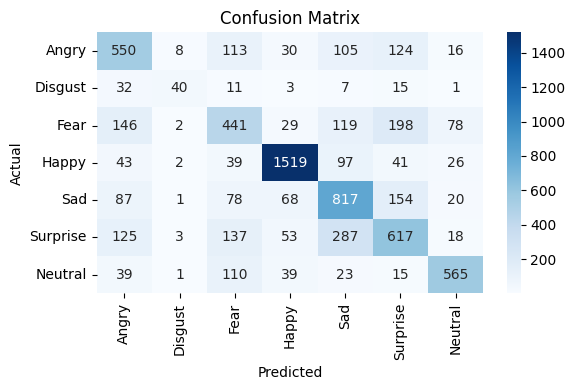

In [33]:
# Visualizing evaluation Metric Score chart
#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

Found 26942 files belonging to 7 classes.
Found 7092 files belonging to 7 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 48, 48, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,271 (669.03 KB)

 Trainable params: 171,271 (669.03 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
840/842 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.2521 - loss: 1.7989
Epoch 1: val_accuracy improved from None to 0.40327, saving model to cnn_model4.keras

Epoch 1: finished saving model to cnn_model4.keras
842/842 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.2912 - loss: 1.7419 - val_accuracy: 0.4033 - val_loss: 1.5746 - learning_rate: 0.0010
Epoch 2/30
842/842 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3738 - loss: 1.5894
Epoch 2: val_accuracy improved from 0.40327 to 0.45178, saving model to cnn_model4.keras

Epoch 2: finished saving model to cnn_model4.keras
842/842 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.3924 - loss: 1.5541 - val_accuracy: 0.4518 - val_loss: 1.4322 - learning_rate: 0.0010
Epoch 3/30
841/842 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4258 - loss: 1.4768
Epoch 3: val_accuracy improved from 0.45178 to 0.47138, saving model to cnn_model4.keras

Epoch 3: finished saving model to cnn_model4.keras
842/842 ━━━━━━━━━━━━━━━━━━━━ 14s 

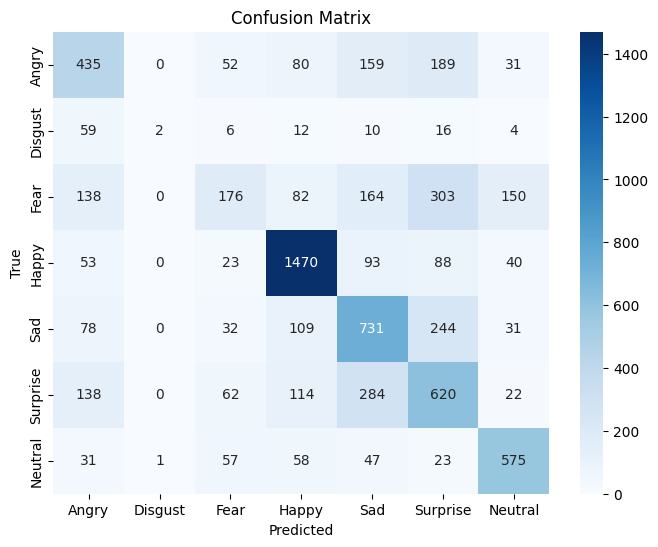

: 

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Paths
train_dir = 'preprocessed_images/train'
val_dir = 'preprocessed_images/test'
model_save_path = 'cnn_model4.keras'

# Class Names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Hyperparameters
IMG_SIZE = (48, 48)
BATCH_SIZE = 32
EPOCHS = 30  # fewer epochs

# DATASETS
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Prefetch for performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

# MODEL
inputs = tf.keras.Input(shape=(48,48,1))
x = tf.keras.layers.Rescaling(1./255)(inputs)
x = tf.keras.layers.RandomFlip("horizontal")(x)

# 1st Conv Block
x = tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

# 2nd Conv Block
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

# 3rd Conv Block (optional lightweight)
x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2,2))(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Head
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(7, activation='softmax', dtype='float32')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

# COMPILE
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# CALLBACKS
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=model_save_path,
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    ),
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=2,
        verbose=1
    )
]

# TRAIN
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=callbacks
)

# EVALUATION
y_true, y_pred = [], []
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(tf.argmax(labels, axis=1).numpy())
    y_pred.extend(tf.argmax(preds, axis=1).numpy())

print("\n📋 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()